In [1]:
import numpy as np
from astrotools import skymap



In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

from torch.utils.data import DataLoader
from torch.utils.data.dataset import random_split

import torchvision
import torchvision.transforms as transforms

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import time
import pickle

from PIL import Image

import tensorflow as tf
print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.5.0


In [3]:
#Intentando usar astrotools
try:
    import astrotools
    from astrotools import auger, coord, skymap
except ModuleNotFoundError: 
    print("Instalandolo entonces\n")
    !pip install healpy
    !pip install astrotools

#### Montado para jalar la info de GitHub

In [4]:
#para evitar clonar recursivamente
#if os.getcwd()=='/content':
#  ! git clone https://github.com/gsusAguirreArz/proyectoConexionistaA21

In [5]:
#%ls

In [6]:
#!ls

In [7]:
#if os.getcwd()=='/content':
#  %cd proyectoConexionistaA21/


In [8]:
#!ls

#### Montado de Drive

In [9]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
!ls "/content/drive/MyDrive/Proyecto/data/cosmic_ray_sphere" #Path de José Ángel


dataset_HAP.npz


In [11]:
dir ="/content/drive/MyDrive/Proyecto/data/cosmic_ray_sphere/"
#Aquí tu path chucho :D

In [12]:
dir

'/content/drive/MyDrive/Proyecto/data/cosmic_ray_sphere/'

In [13]:
def deflected_cosmic_rays():
    file = np.load(dir+"dataset_HAP.npz")
    x_train, x_test = file["data"][:-10000], file["data"][-10000:]
    labels = tf.keras.utils.to_categorical(file["label"],num_classes=2)
    y_train, y_test = labels[:-10000], labels[-10000:]
    return x_train, x_test, y_train, y_test

In [14]:
X_train, X_test, y_train, y_test = deflected_cosmic_rays()

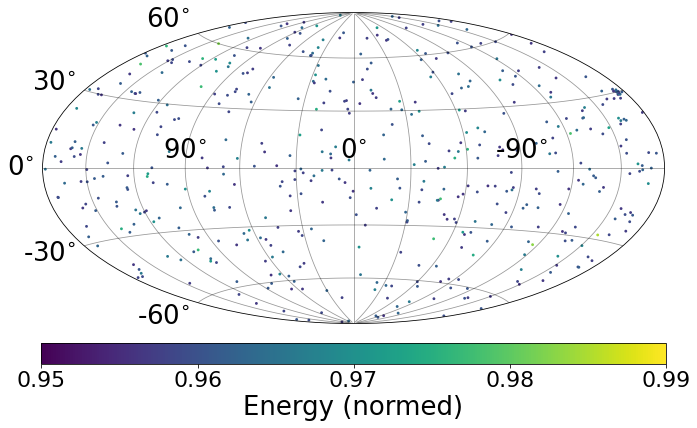

<Figure size 864x432 with 0 Axes>

In [20]:
test_id = 0
example_map = X_test[0]
skymap.eventmap(example_map[:,0:3].T, c=example_map[:,3], cblabel='Energy (normed)', opath="skymap_%i.png" % test_id)
im = Image.open("skymap_0.png")
im

In [21]:
X_test[0][:,0:3], X_test[0]

(array([[-0.9620432 ,  0.25254351, -0.10341501],
        [ 0.61198201,  0.32471426,  0.72113707],
        [-0.47282423, -0.86560326, -0.16482789],
        ...,
        [-0.64076128, -0.76768573, -0.00914393],
        [ 0.12229378, -0.97279968, -0.19673591],
        [ 0.97048795, -0.15635621, -0.18359159]]),
 array([[-0.9620432 ,  0.25254351, -0.10341501,  0.96365864],
        [ 0.61198201,  0.32471426,  0.72113707,  0.96360986],
        [-0.47282423, -0.86560326, -0.16482789,  0.95639037],
        ...,
        [-0.64076128, -0.76768573, -0.00914393,  0.96414645],
        [ 0.12229378, -0.97279968, -0.19673591,  0.96082938],
        [ 0.97048795, -0.15635621, -0.18359159,  0.96760985]]))